In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv("insurance.csv")

In [27]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
df.shape

(1338, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
# hecking for the missing data
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Distribution of each column**

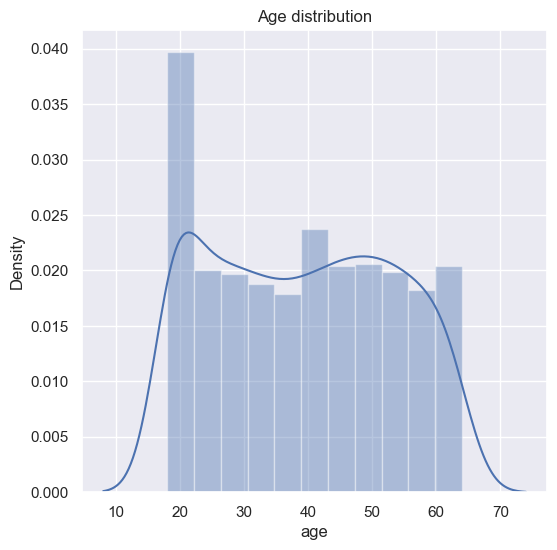

In [31]:
# distributio of 'age' column
sns.set()
ply.figure(figsize=(6,6))
sns.distplot(df['age'])
ply.title('Age distribution')
ply.show()

Text(0.5, 1.0, 'Sex distribution')

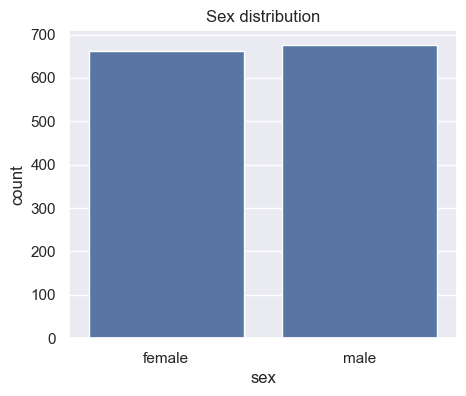

In [32]:
# distribution of sex
ply.figure(figsize=(5,4))
sns.countplot(x='sex',data=df)
ply.title("Sex distribution")

In [33]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

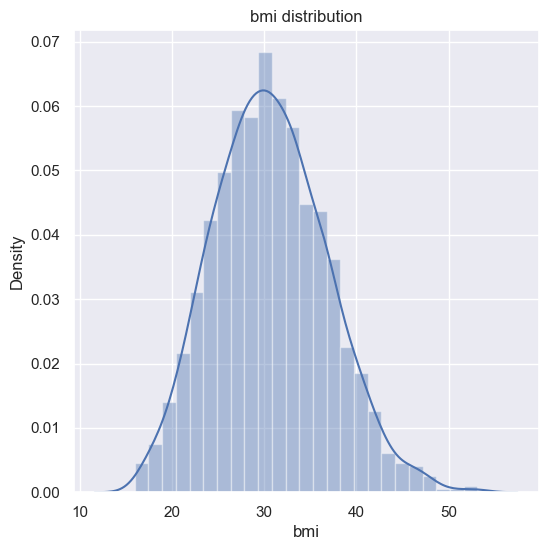

In [10]:
# distribution for 'bmi'
ply.figure(figsize=(6,6))
sns.distplot(df['bmi'])
ply.title('bmi distribution')
ply.show()

Text(0.5, 1.0, 'Children distribution')

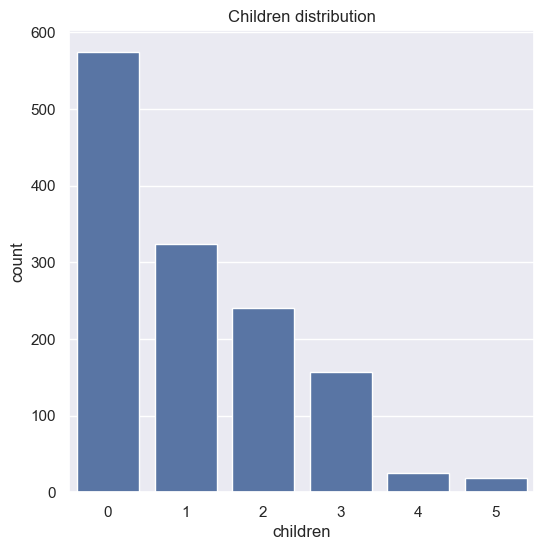

In [34]:
# distributin of children
ply.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
ply.title("Children distribution")

Text(0.5, 1.0, 'smoker distribution')

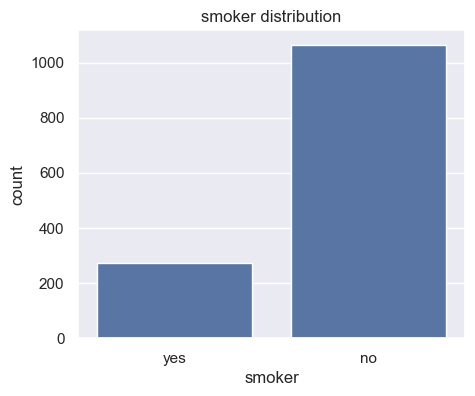

In [35]:
# distribution of "Smokers"
ply.figure(figsize=(5,4))
sns.countplot(x='smoker',data=df)
ply.title("smoker distribution")

In [36]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'region distribution')

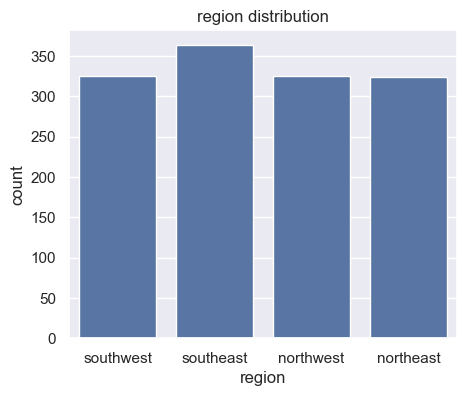

In [14]:
# distribution of region
ply.figure(figsize=(5,4))
sns.countplot(x='region',data=df)
ply.title("region distribution")

Text(0.5, 1.0, 'charges distribution')

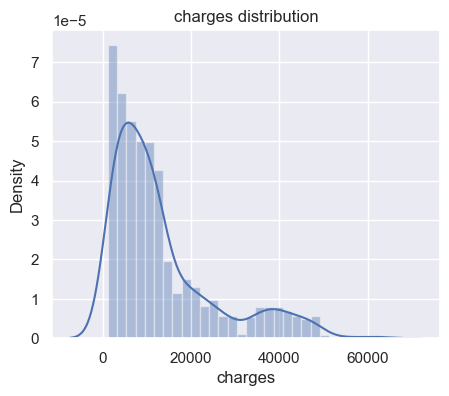

In [37]:
# distribution of charges
ply.figure(figsize=(5,4))
sns.distplot(df['charges'])
ply.title("charges distribution")

**Encoding**

In [38]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [39]:
# All the colunms that contain string values are converted into integer format.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


**Splitting of independent and dependent features**

In [40]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

**Splitting of data into training and test data**

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print("shape of X",X.shape)
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)

shape of X (1338, 6)
shape of X_train (1070, 6)
shape of X_test (268, 6)


**Model Training**

1) Linear Regression

In [42]:
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [43]:
LinearRegression()


LinearRegression()

In [44]:
# r2_score for training data
train_pred=model.predict(X_train)
train_score=r2_score(Y_train,train_pred)
print("r2 score for training data: ",train_score)

r2 score for training data:  0.751505643411174


In [45]:
# r2_score for test data
test_pred=model.predict(X_test)
test_score=r2_score(Y_test,test_pred)
print("r2 score for testing data: ",test_score)

r2 score for testing data:  0.7447273869684077


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

##In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.